### <span style=color:blue> DISCUSSION 8 - Working with mongodb (local) Continued </span>

In [1]:
# Import the required packages 

import sys
import json
import csv
import yaml
import time
from IPython.display import display

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

import pprint

import psycopg2
from sqlalchemy import create_engine, text as sql_text

In [2]:
# Create an utilities file util.py in a folder benchmarking and import it

sys.path.append('benchmarking/')
import util

In [3]:
# test that utils.py has been imported well

util.hello_world()

Hello World


In [4]:
# Initialize pretty print and display

pp = pprint.PrettyPrinter(indent=4)

##### <span style=color:blue>Basic Commands for mongosh (MongoDB Shell)</span>

In [5]:
# Use mongosh provided in MongoDB Compass
# You can also download the mongodb shell from -> https://www.mongodb.com/try/download/shell

# BASIC COMMANDS IN MONGOSH
data = {
    "Command": [
        "show dbs",
        "use <database>",
        "show collections",
        "db.createCollection('collectionName')",
        "db.<collection>.insertOne({})",
        "db.<collection>.insertMany([{}])",
        "db.<collection>.find()",
        "db.<collection>.updateOne({}, {$set: {}})",
        "db.<collection>.updateMany({}, {$set: {}})",
        "db.<collection>.deleteOne({})",
        "db.<collection>.deleteMany({})",
        "db.<collection>.drop()",
        "db.dropDatabase()",
        "db.<collection>.createIndex({})",
        "db.<collection>.dropIndex('indexName')"
    ],
    "Description": [
        "Lists all databases.",
        "Switches to the specified database. Creates the database if it doesn't exist.",
        "Lists all collections in the current database.",
        "Creates a new collection with the specified name.",
        "Inserts a single document into the collection.",
        "Inserts multiple documents into the collection.",
        "Retrieves all documents from the collection.",
        "Updates a single document in the collection.",
        "Updates multiple documents in the collection.",
        "Deletes a single document from the collection.",
        "Deletes multiple documents from the collection.",
        "Drops the specified collection.",
        "Drops the current database.",
        "Creates an index on the specified field(s).",
        "Drops the specified index."
    ]
}

df = pd.DataFrame(data)

display(df)

,Command,Description
0,show dbs,Lists all databases.
1,use <database>,Switches to the specified database. Creates th...
2,show collections,Lists all collections in the current database.
3,db.createCollection('collectionName'),Creates a new collection with the specified name.
4,db.<collection>.insertOne({}),Inserts a single document into the collection.
5,db.<collection>.insertMany([{}]),Inserts multiple documents into the collection.
6,db.<collection>.find(),Retrieves all documents from the collection.
7,"db.<collection>.updateOne({}, {$set: {}})",Updates a single document in the collection.
8,"db.<collection>.updateMany({}, {$set: {}})",Updates multiple documents in the collection.
9,db.<collection>.deleteOne({}),Deletes a single document from the collection.


##### <span style=color:blue>Connecting to mongoDB and importing data</span>

In [6]:
# Setup the mongoclient and connect to local instance of mongodb
# Go to the MongoDBCompass and click on Connect for the connected on port 27017
# If run into the error -> ECONREFUSSED then check out https://stackoverflow.com/questions/46523321/mongoerror-connect-econnrefused-127-0-0-127017

from pymongo import MongoClient

client = MongoClient("mongodb://localhost:27017/")

In [7]:
# Connect to the company db 

db=client["company"]

In [8]:
# IMPORTANT NOTE: Do not reload the the data if you've already done so 
# If not then Load CSV files into DataFrames

department_df = pd.read_csv("data/department.csv")
dependent_df = pd.read_csv("data/dependent.csv")
dept_locations_df = pd.read_csv("data/dept_locations.csv")
employee_df = pd.read_csv("data/employee.csv")
project_df = pd.read_csv("data/project.csv")
works_on_df = pd.read_csv("data/works_on.csv")

print(department_df)
print(dependent_df)
print(dept_locations_df)
print(employee_df)
print(project_df)
print(works_on_df)

            dname  dnumber    mgr_ssn mgr_start_date
0        Research        5  333445555        5/22/88
1  Administration        4  987654321         1/1/95
2    Headquarters        1  888665555        6/19/81
        essn dependent_name gender     bdate relationship
0  333445555          Alice      F    4/5/86     Daughter
1  333445555       Theodore      M  10/25/83          Son
2  333445555            Joy      F    5/3/58       Spouse
3  987654321          Abner      M   2/28/42       Spouse
4  123456789        Michael      M    1/4/88          Son
5  123456789          Alice      F  12/30/88     Daughter
6  123456789      Elizabeth      F    5/5/67       Spouse
   dnumber  dlocation
0        1    Houston
1        4   Stafford
2        5   Bellaire
3        5  Sugarland
4        5    Houston
      fname minit    lname        ssn     bdate                 address  \
0      John     B    Smith  123456789    1/9/65  731-Fondren-Houston-TX   
1  Franklin     T     Wong  333445555   12

In [9]:
# Insert data into MongoDB and check in MongoDB Compass or use the shell

# first clearing all the collections
db.departments.drop()
db.dependents.drop()
db.dept_locations.drop()
db.employees.drop()
db.projects.drop()
db.works_on.drop()

db.departments.insert_many(department_df.to_dict('records'))
db.dependents.insert_many(dependent_df.to_dict('records'))
db.dept_locations.insert_many(dept_locations_df.to_dict('records'))
db.employees.insert_many(employee_df.to_dict('records'))
db.projects.insert_many(project_df.to_dict('records'))
db.works_on.insert_many(works_on_df.to_dict('records'))

InsertManyResult([ObjectId('665b672823735d575690b4a5'), ObjectId('665b672823735d575690b4a6'), ObjectId('665b672823735d575690b4a7'), ObjectId('665b672823735d575690b4a8'), ObjectId('665b672823735d575690b4a9'), ObjectId('665b672823735d575690b4aa'), ObjectId('665b672823735d575690b4ab'), ObjectId('665b672823735d575690b4ac'), ObjectId('665b672823735d575690b4ad'), ObjectId('665b672823735d575690b4ae'), ObjectId('665b672823735d575690b4af'), ObjectId('665b672823735d575690b4b0'), ObjectId('665b672823735d575690b4b1'), ObjectId('665b672823735d575690b4b2'), ObjectId('665b672823735d575690b4b3'), ObjectId('665b672823735d575690b4b4')], acknowledged=True)

In [10]:
# SANITY CHECK - Print all employees in company

print("Employees in the Database:")

employees = db.employees.find()
for emp in employees:
    pp.pprint(emp)

Employees in the Database:
{   '_id': ObjectId('665b672823735d575690b497'),
    'address': '731-Fondren-Houston-TX',
    'bdate': '1/9/65',
    'dno': 5,
    'fname': 'John',
    'gender': 'M',
    'lname': 'Smith',
    'minit': 'B',
    'salary': 30000,
    'ssn': 123456789,
    'super_ssn': 333445555.0}
{   '_id': ObjectId('665b672823735d575690b498'),
    'address': '638-Voss-Houston-TX',
    'bdate': '12/8/55',
    'dno': 5,
    'fname': 'Franklin',
    'gender': 'M',
    'lname': 'Wong',
    'minit': 'T',
    'salary': 40000,
    'ssn': 333445555,
    'super_ssn': 888665555.0}
{   '_id': ObjectId('665b672823735d575690b499'),
    'address': '3321-Castle-Spring-TX',
    'bdate': '1/19/68',
    'dno': 4,
    'fname': 'Alicia',
    'gender': 'F',
    'lname': 'Zelaya',
    'minit': 'J',
    'salary': 25000,
    'ssn': 999887777,
    'super_ssn': 987654321.0}
{   '_id': ObjectId('665b672823735d575690b49a'),
    'address': '291-Berry-Bellaire-TX',
    'bdate': '6/20/41',
    'dno': 4,
  

In [11]:
print("Departments in the Database:")

departments = db.departments.find()
for dept in departments:
    pp.pprint(dept)

Departments in the Database:
{   '_id': ObjectId('665b672823735d575690b488'),
    'dname': 'Research',
    'dnumber': 5,
    'mgr_ssn': 333445555,
    'mgr_start_date': '5/22/88'}
{   '_id': ObjectId('665b672823735d575690b489'),
    'dname': 'Administration',
    'dnumber': 4,
    'mgr_ssn': 987654321,
    'mgr_start_date': '1/1/95'}
{   '_id': ObjectId('665b672823735d575690b48a'),
    'dname': 'Headquarters',
    'dnumber': 1,
    'mgr_ssn': 888665555,
    'mgr_start_date': '6/19/81'}


In [12]:
print("works_on in the Database:")

works_on = db.works_on.find()
for wo in works_on:
    pp.pprint(wo)

works_on in the Database:
{   '_id': ObjectId('665b672823735d575690b4a5'),
    'essn': 123456789,
    'hours': 32.5,
    'pno': 1}
{   '_id': ObjectId('665b672823735d575690b4a6'),
    'essn': 123456789,
    'hours': 7.5,
    'pno': 2}
{   '_id': ObjectId('665b672823735d575690b4a7'),
    'essn': 666884444,
    'hours': 40.0,
    'pno': 3}
{   '_id': ObjectId('665b672823735d575690b4a8'),
    'essn': 453453453,
    'hours': 20.0,
    'pno': 1}
{   '_id': ObjectId('665b672823735d575690b4a9'),
    'essn': 453453453,
    'hours': 20.0,
    'pno': 2}
{   '_id': ObjectId('665b672823735d575690b4aa'),
    'essn': 333445555,
    'hours': 10.0,
    'pno': 2}
{   '_id': ObjectId('665b672823735d575690b4ab'),
    'essn': 333445555,
    'hours': 10.0,
    'pno': 3}
{   '_id': ObjectId('665b672823735d575690b4ac'),
    'essn': 333445555,
    'hours': 10.0,
    'pno': 10}
{   '_id': ObjectId('665b672823735d575690b4ad'),
    'essn': 333445555,
    'hours': 10.0,
    'pno': 20}
{   '_id': ObjectId('665b672

<span style=color:blue>Fetching type of one field</span>

In [13]:
# following https://stackoverflow.com/questions/3208538/return-actual-type-of-a-field-in-mongodb
types = db.works_on.aggregate( 
    [ 
        { "$project": { "fieldType": {  "$type": "$hours"  } } } 
    ]
)

for t in types:
    pp.pprint(t)

{'_id': ObjectId('665b672823735d575690b4a5'), 'fieldType': 'double'}
{'_id': ObjectId('665b672823735d575690b4a6'), 'fieldType': 'double'}
{'_id': ObjectId('665b672823735d575690b4a7'), 'fieldType': 'double'}
{'_id': ObjectId('665b672823735d575690b4a8'), 'fieldType': 'double'}
{'_id': ObjectId('665b672823735d575690b4a9'), 'fieldType': 'double'}
{'_id': ObjectId('665b672823735d575690b4aa'), 'fieldType': 'double'}
{'_id': ObjectId('665b672823735d575690b4ab'), 'fieldType': 'double'}
{'_id': ObjectId('665b672823735d575690b4ac'), 'fieldType': 'double'}
{'_id': ObjectId('665b672823735d575690b4ad'), 'fieldType': 'double'}
{'_id': ObjectId('665b672823735d575690b4ae'), 'fieldType': 'double'}
{'_id': ObjectId('665b672823735d575690b4af'), 'fieldType': 'double'}
{'_id': ObjectId('665b672823735d575690b4b0'), 'fieldType': 'double'}
{'_id': ObjectId('665b672823735d575690b4b1'), 'fieldType': 'double'}
{'_id': ObjectId('665b672823735d575690b4b2'), 'fieldType': 'double'}
{'_id': ObjectId('665b672823735d57

##### <span style=color:blue>Aggregation Queries</span>

In [14]:
avg_sal_dept_v01 = db.employees.aggregate([
    {
        # Group documents by the dno field and create a new average_salary field
        "$group": {
            "_id": "$dno",
            "average_salary": {"$avg": "$salary"}
        }
    }
])

print("avg_sal_dept_v01:")

for dept in avg_sal_dept_v01:
    pp.pprint(dept)

avg_sal_dept_v01:
{'_id': 1, 'average_salary': 55000.0}
{'_id': 5, 'average_salary': 33250.0}
{'_id': 4, 'average_salary': 31000.0}


In [15]:
avg_sal_dept_v02 = db.employees.aggregate([
    {
        # Group documents by the dno field and create a new average_salary field
        "$group": {
            "_id": "$dno",
            "average_salary": {"$avg": "$salary"}
        }
    },
    {
        # Perform join between departments and employees
        "$lookup": {
            "from": "departments",
            "localField": "_id",
            "foreignField": "dnumber",
            "as": "department_info"
        }
    }
])

print("avg_sal_dept_v02:")

for dept in avg_sal_dept_v02:
    pp.pprint(dept)

avg_sal_dept_v02:
{   '_id': 5,
    'average_salary': 33250.0,
    'department_info': [   {   '_id': ObjectId('665b672823735d575690b488'),
                               'dname': 'Research',
                               'dnumber': 5,
                               'mgr_ssn': 333445555,
                               'mgr_start_date': '5/22/88'}]}
{   '_id': 4,
    'average_salary': 31000.0,
    'department_info': [   {   '_id': ObjectId('665b672823735d575690b489'),
                               'dname': 'Administration',
                               'dnumber': 4,
                               'mgr_ssn': 987654321,
                               'mgr_start_date': '1/1/95'}]}
{   '_id': 1,
    'average_salary': 55000.0,
    'department_info': [   {   '_id': ObjectId('665b672823735d575690b48a'),
                               'dname': 'Headquarters',
                               'dnumber': 1,
                               'mgr_ssn': 888665555,
                               'mgr_

In [16]:
avg_sal_dept_v03 = db.employees.aggregate([
    {
        # Group documents by the dno field and create a new average_salary field
        "$group": {
            "_id": "$dno",
            "average_salary": {"$avg": "$salary"}
        }
    },
    {
        # Perform join between departments and employees
        "$lookup": {
            "from": "departments",
            "localField": "_id",
            "foreignField": "dnumber",
            "as": "department_info"
        }
    },
    {"$unwind": "$department_info"}
])

print("avg_sal_dept_v03:")

for dept in avg_sal_dept_v03:
    pp.pprint(dept)

avg_sal_dept_v03:
{   '_id': 1,
    'average_salary': 55000.0,
    'department_info': {   '_id': ObjectId('665b672823735d575690b48a'),
                           'dname': 'Headquarters',
                           'dnumber': 1,
                           'mgr_ssn': 888665555,
                           'mgr_start_date': '6/19/81'}}
{   '_id': 4,
    'average_salary': 31000.0,
    'department_info': {   '_id': ObjectId('665b672823735d575690b489'),
                           'dname': 'Administration',
                           'dnumber': 4,
                           'mgr_ssn': 987654321,
                           'mgr_start_date': '1/1/95'}}
{   '_id': 5,
    'average_salary': 33250.0,
    'department_info': {   '_id': ObjectId('665b672823735d575690b488'),
                           'dname': 'Research',
                           'dnumber': 5,
                           'mgr_ssn': 333445555,
                           'mgr_start_date': '5/22/88'}}


In [17]:
# Calculate the average salary in each department

average_salary_per_department = db.employees.aggregate([
    {
        # Group documents by the dno field and create a new average_salary field
        "$group": {
            "_id": "$dno",
            "average_salary": {"$avg": "$salary"}
        }
    },
    {
        # Perform join between departments and employees
        "$lookup": {
            "from": "departments",
            "localField": "_id",
            "foreignField": "dnumber",
            "as": "department_info"
        }
    },
    {"$unwind": "$department_info"},
    {
        # Shape the output documents to include only the required fields.
        "$project": {
            "department_name": "$department_info.dname",
            "average_salary": 2
        }
    }
])

print("Average Salary Per Department:")

for dept in average_salary_per_department:
    pp.pprint(dept)

# The above query will look like follows in SQL
# SELECT 
#     d.dname AS department_name,
#     AVG(e.salary) AS average_salary
# FROM 
#     employees e
# JOIN 
#     departments d ON e.dno = d.dnumber
# GROUP BY 
#     d.dname;

Average Salary Per Department:
{'_id': 5, 'average_salary': 33250.0, 'department_name': 'Research'}
{'_id': 4, 'average_salary': 31000.0, 'department_name': 'Administration'}
{'_id': 1, 'average_salary': 55000.0, 'department_name': 'Headquarters'}


In [18]:
# Aggregation pipeline to find the total hours worked on each project
# This will return a result where for project_name "Reorganization" the "total_hours" worked is nan

# Saving the total hours worked per project query so that we won't have to type it each time
total_hours_per_project_query = [
    {
        "$group": {
            "_id": "$pno",
            "total_hours": {"$sum": "$hours"}
        }
    },
    {
        "$lookup": {
            "from": "projects",
            "localField": "_id",
            "foreignField": "pnumber",
            "as": "project_info"
        }
    },
    {"$unwind": "$project_info"},
    {
        "$project": {
            "project_name": "$project_info.pname",
            "total_hours": 1
        }
    }
]

# Running the query
total_hours_per_project = db.works_on.aggregate(total_hours_per_project_query)

print("Total Hours Worked on Each Project:")

for project in total_hours_per_project:
    pp.pprint(project)
    
# The above query will look like follows in SQL
# SELECT 
#     p.pname AS project_name,
#     SUM(COALESCE(w.hours, 0)) AS total_hours
# FROM 
#     works_on w
# JOIN 
#     projects p ON w.pno = p.pnumber
# GROUP BY 
#     p.pname;

Total Hours Worked on Each Project:
{'_id': 10, 'project_name': 'Computerization', 'total_hours': 55.0}
{'_id': 20, 'project_name': 'Reorganization', 'total_hours': nan}
{'_id': 2, 'project_name': 'ProductY', 'total_hours': 37.5}
{'_id': 30, 'project_name': 'Newbenefits', 'total_hours': 55.0}
{'_id': 1, 'project_name': 'ProductX', 'total_hours': 52.5}
{'_id': 3, 'project_name': 'ProductZ', 'total_hours': 50.0}


In [19]:
print(db.list_collection_names())

['projects', 'dept_locations', 'dependents', 'employees', 'departments', 'works_on']


In [20]:
# Update all documents in works_on where hours is NaN to set hours to 0

result = db.works_on.update_many(
#     {"hours": {"$exists": True, "$type": "double", "$in": [float('nan')]}},
    {"hours": {"$exists": True, "$in": [float('nan')]}},
    {"$set": {"hours": 0}}
)

print(f"Matched {result.matched_count} documents and modified {result.modified_count} documents.")

Matched 1 documents and modified 1 documents.


In [21]:
# Run the "Aggregation pipeline to find the total hours worked on each project" again
# And check if you're getting nan values now

total_hours_per_project = db.works_on.aggregate(total_hours_per_project_query)

print("Total Hours Worked on Each Project:")

for project in total_hours_per_project:
    pp.pprint(project)

Total Hours Worked on Each Project:
{'_id': 3, 'project_name': 'ProductZ', 'total_hours': 50.0}
{'_id': 10, 'project_name': 'Computerization', 'total_hours': 55.0}
{'_id': 20, 'project_name': 'Reorganization', 'total_hours': 25.0}
{'_id': 1, 'project_name': 'ProductX', 'total_hours': 52.5}
{'_id': 30, 'project_name': 'Newbenefits', 'total_hours': 55.0}
{'_id': 2, 'project_name': 'ProductY', 'total_hours': 37.5}


In [22]:
# Rick recreating Aunsh's query
#   Calculate the total number of employees per department, including the department names, 
#   and sorting the result in descending order of total employees

pipeline1 = [
    {'$group': {'_id': '$dno', 'count': {'$sum': 1}}},
    {'$lookup':
         { 'from': 'departments',
           'localField': '_id',
           'foreignField': 'dnumber',
           'as': 'dept_list'
         }
    },
    {'$unwind' : '$dept_list'},
    {'$project' : { 'dept_name': '$dept_list.dname', 'emp_count': '$count'} },
    # {'$sort' : { 'emp_count' : -1}}
    {'$sort' : { 'emp_count' : 1}}


]

te = db.employees.aggregate(pipeline1)
# pp.pprint(list(te))
print()
for t in te:
    pp.pprint(t)


{'_id': 1, 'dept_name': 'Headquarters', 'emp_count': 1}
{'_id': 4, 'dept_name': 'Administration', 'emp_count': 3}
{'_id': 5, 'dept_name': 'Research', 'emp_count': 4}


In [23]:
# Calculate the total number of employees per department, including the department names, 
# and sorting the result in descending order of total employees

pipeline = [
    {"$group": {"_id": "$dno", "count": {"$sum": 1}}},
    {"$lookup": {
        "from": "departments",
        "localField": "_id",
        "foreignField": "dnumber",
        "as": "department_info"
    }},
    {"$unwind": "$department_info"},
    {"$project": {"department_name": "$department_info.dname", "count": 1}},
    {"$sort": {"count": -1}}
]

# Execute the aggregation pipeline
total_employees_per_department = db.employees.aggregate(pipeline)

# Print the results
pp.pprint(list(total_employees_per_department))

[   {'_id': 5, 'count': 4, 'department_name': 'Research'},
    {'_id': 4, 'count': 3, 'department_name': 'Administration'},
    {'_id': 1, 'count': 1, 'department_name': 'Headquarters'}]


In [24]:
# What if you want to check the output of the intermediaries in a pipeline?

pipeline = [
    {"$group": {
        "_id": "$dno",
        "count": {"$sum": 1},
        "intermediate_group": {"$push": "$$ROOT"}
    }},
    {"$lookup": {
        "from": "departments",
        "localField": "_id",
        "foreignField": "dnumber",
        "as": "department_info"
    }},
    {"$addFields": {"intermediate_lookup": "$department_info"}},
    {"$unwind": "$department_info"},
    {"$addFields": {"intermediate_unwind": "$department_info"}},
    {"$project": {
        "department_name": "$department_info.dname",
        "count": 1,
        "intermediate_group": 1,
        "intermediate_lookup": 1,
        "intermediate_unwind": 1
    }},
    {"$sort": {"count": -1}}
]

# Execute the aggregation pipeline
total_employees_per_department = db.employees.aggregate(pipeline)

# Print the results
for doc in total_employees_per_department:
    print("\nResult Document:")
    pp.pprint(doc)
    print("\nIntermediate Group Stage:")
    pp.pprint(doc.get("intermediate_group"))
    print("\nIntermediate Lookup Stage:")
    pp.pprint(doc.get("intermediate_lookup"))
    print("\nIntermediate Unwind Stage:")
    pp.pprint(doc.get("intermediate_unwind"))


Result Document:
{   '_id': 5,
    'count': 4,
    'department_name': 'Research',
    'intermediate_group': [   {   '_id': ObjectId('665b672823735d575690b497'),
                                  'address': '731-Fondren-Houston-TX',
                                  'bdate': '1/9/65',
                                  'dno': 5,
                                  'fname': 'John',
                                  'gender': 'M',
                                  'lname': 'Smith',
                                  'minit': 'B',
                                  'salary': 30000,
                                  'ssn': 123456789,
                                  'super_ssn': 333445555.0},
                              {   '_id': ObjectId('665b672823735d575690b498'),
                                  'address': '638-Voss-Houston-TX',
                                  'bdate': '12/8/55',
                                  'dno': 5,
                                  'fname': 'Franklin',
      

##### <span style=color:blue>Indexing and Benchmarking</span>

In [25]:
# Drop all existing indices for the collection employees

collection_emp = db.employees

print(collection_emp)

collection_emp.drop_indexes()

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'company'), 'employees')


In [26]:
# Run the query (function in util.py) and store it in benchmark_data

benchmark_data=[]

# Return all employees with salay greater than 30k
q1 = {"salary": {"$gt": 30000}}

bench_data_1 = util.benchmark_query(q1, time, benchmark_data, collection_emp)
print()
pp.pprint(benchmark_data)


Querying without index...
Query took 0.004898 seconds
Number of results: 4

[   {   'duration': 0.0048978328704833984,
        'index_name': None,
        'query': {'salary': {'$gt': 30000}},
        'result_count': 4}]


In [27]:
# Create an index on the salary field

collection_emp.create_index("salary")

'salary_1'

In [28]:
# Benchmark with index

bench_data_2 = util.benchmark_query(q1, time, bench_data_1, collection_emp, index_name="salary")


Querying with index on salary...
Query took 0.007094 seconds
Number of results: 4


In [29]:
pp.pprint(bench_data_2)

[   {   'duration': 0.0048978328704833984,
        'index_name': None,
        'query': {'salary': {'$gt': 30000}},
        'result_count': 4},
    {   'duration': 0.007093906402587891,
        'index_name': 'salary',
        'query': {'salary': {'$gt': 30000}},
        'result_count': 4}]


In [30]:
# Save benchmark data to a JSON file in the perf_data folder
with open("perf_data/benchmark_data.json", "w") as file:
    json.dump(bench_data_2, file)

In [31]:
# Print to verify 
pp.pprint(bench_data_2)

[   {   'duration': 0.0048978328704833984,
        'index_name': None,
        'query': {'salary': {'$gt': 30000}},
        'result_count': 4},
    {   'duration': 0.007093906402587891,
        'index_name': 'salary',
        'query': {'salary': {'$gt': 30000}},
        'result_count': 4}]


In [32]:
# Drop the index
collection_emp.drop_index("salary_1")

# Create a new complex query
q2 = {"dno": 5, "salary": {"$gt": 30000}}

In [33]:
# Benchmarking new query without index
bench_data_3 = util.benchmark_query(q2, time, bench_data_2, collection_emp)


Querying without index...
Query took 0.001380 seconds
Number of results: 2


In [34]:
# Creating a compound index 
collection_emp.create_index([("dno", 1), ("salary", 1)])

'dno_1_salary_1'

In [35]:
# Benchmarking new query with index
bench_data_4 = util.benchmark_query(q2, time, bench_data_3, collection_emp, index_name="dno + salary")


Querying with index on dno + salary...
Query took 0.003879 seconds
Number of results: 2


In [36]:
# Save benchmark data to a JSON file in the perf_data folder
with open("perf_data/benchmark_data.json", "w") as file:
    json.dump(bench_data_4, file)

##### <span style=color:blue>Visualization</span>

In [44]:
# Load benchmark data
with open("perf_data/benchmark_data.json") as file:
    benchmark_data = json.load(file)

# Create a DataFrame
df = pd.DataFrame(benchmark_data)

df['query_name'] = df['query'].apply(lambda x:'dno=5&sal>30000' if 'dno' in x else 'sal>30000')

print(df)

                                  query    index_name  duration  result_count  \
0            {'salary': {'$gt': 30000}}          None  0.004898             4   
1            {'salary': {'$gt': 30000}}        salary  0.007094             4   
2  {'dno': 5, 'salary': {'$gt': 30000}}          None  0.001380             2   
3  {'dno': 5, 'salary': {'$gt': 30000}}  dno + salary  0.003879             2   

        query_name  
0        sal>30000  
1        sal>30000  
2  dno=5&sal>30000  
3  dno=5&sal>30000  


In [39]:
# testing
# compute avg_no_index
avg_no_index = df.loc[df['index_name'] != df['index_name']].loc[:,'duration'].mean()
print(avg_no_index)

0.003138899803161621


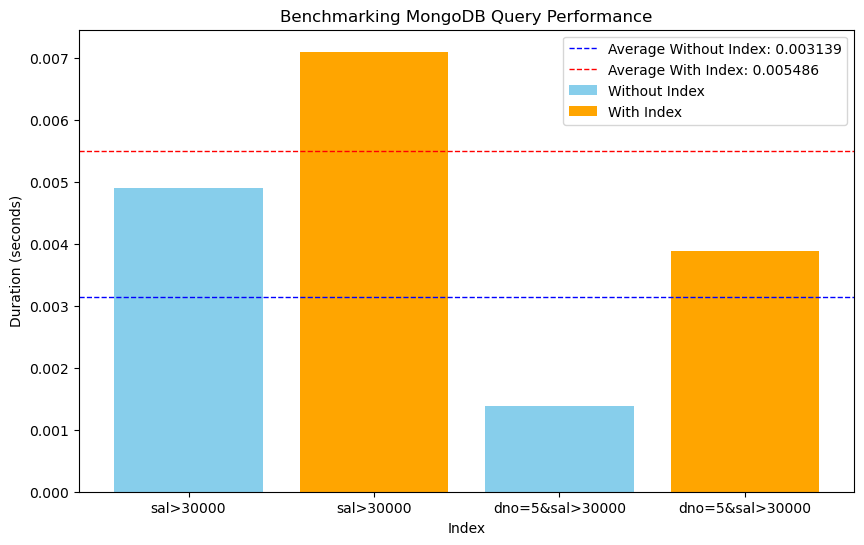

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot without index
df_no_index = df[df['index_name'].isnull()]
ax.bar(df_no_index.index, df_no_index['duration'], label='Without Index', color='skyblue')

# Plot with index
df_with_index = df[df['index_name'].notnull()]
ax.bar(df_with_index.index, df_with_index['duration'], label='With Index', color='orange')

# compute avg_no_index
avg_no_index = df.loc[df['index_name'] != df['index_name']].loc[:,'duration'].mean()
# compute avg_with_index
avg_with_index = df.loc[df['index_name'] == df['index_name']].loc[:,'duration'].mean()

# Add horizontal lines for average durations
ax.axhline(avg_no_index, color='blue', linestyle='--', linewidth=1, label=f'Average Without Index: {avg_no_index:.6f}')
ax.axhline(avg_with_index, color='red', linestyle='--', linewidth=1, label=f'Average With Index: {avg_with_index:.6f}')

# Add labels and title
ax.set_xticks(df.index)
ax.set_xticklabels(df['query_name'].fillna('None'))
ax.set_xlabel('Index')
ax.set_ylabel('Duration (seconds)')
ax.set_title('Benchmarking MongoDB Query Performance')

# Place the legend in the top right corner
ax.legend(loc='upper right')

# Show plot
plt.show()